In [347]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [348]:
image = cv.imread('cv2.png', cv.IMREAD_GRAYSCALE)


In [349]:
height, width = image.shape[:2]

print("Image width:", width)
print("Image height:", height)

Image width: 512
Image height: 512


In [350]:
f = np.fft.fft2(image)

fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

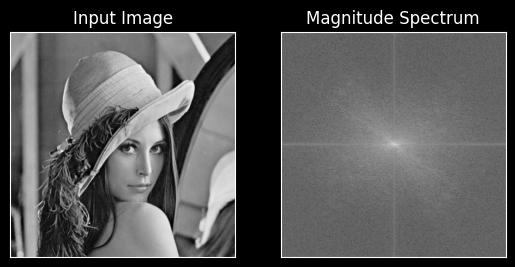

In [351]:
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [352]:
f_ishift = np.fft.ifftshift(fshift)
image_back = np.fft.ifft2(f_ishift)
image_back = np.abs(image_back)
image_back = np.int32(image_back)

(-0.5, 511.5, 511.5, -0.5)

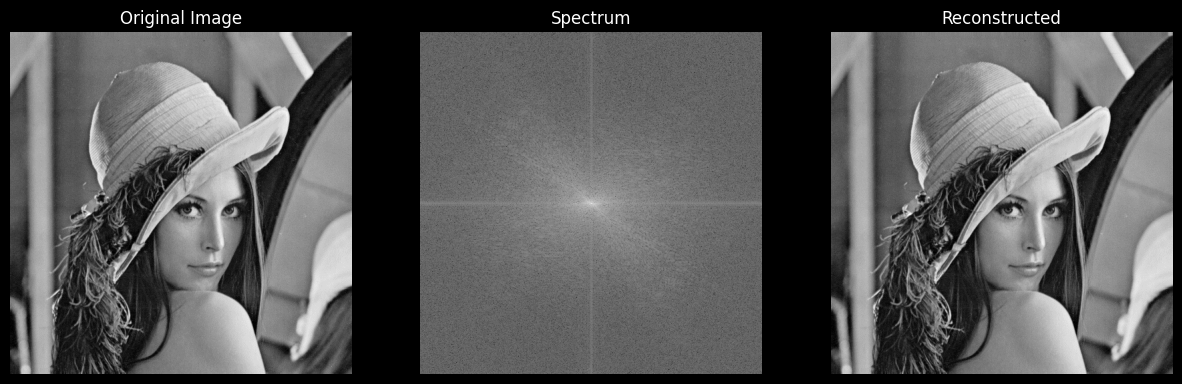

In [353]:
plt.figure(figsize=(15,15))

plt.subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Spectrum')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image_back,cmap='gray')
plt.title('Reconstructed')
plt.axis('off')


In [354]:
for i in range(width):
    for j in range(height):
        print(image[i,j],end=',')
    
    print()

156,164,156,164,164,156,164,156,164,164,164,164,156,164,164,156,156,156,164,164,148,156,156,156,156,156,156,156,156,156,156,156,156,156,156,164,156,164,164,164,164,164,164,172,172,180,172,164,172,172,172,172,172,164,164,156,148,148,156,140,124,124,116,108,92,100,92,92,84,100,108,92,108,100,100,108,100,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,108,100,108,108,108,108,116,116,108,116,116,124,116,116,116,124,124,124,124,116,124,116,132,124,124,124,124,132,132,132,132,132,132,124,132,132,124,132,140,132,132,132,132,124,132,132,124,132,124,132,132,124,132,124,132,124,132,132,132,140,140,124,132,132,140,132,132,132,132,132,132,132,132,140,132,132,132,140,132,132,140,132,132,132,132,132,132,140,132,132,132,132,132,140,132,132,140,132,140,132,140,132,140,132,132,140,132,132,132,140,132,132,140,132,132,124,132,132,124,132,132,132,132,132,132,132,132,140,132,132,132,132,132,132,132,132,132,124,132,132,132,140,132,132,140,132,132,132,140,132,132,132,1

In [355]:
for i in range(width):
    for j in range(height):
        print(image_back[i,j],end=',')
    
    print()

156,164,156,164,164,156,164,156,164,164,164,164,156,164,164,156,156,156,164,164,147,156,156,156,156,156,156,156,156,156,156,156,156,156,156,164,156,164,164,164,164,164,164,172,172,180,172,164,172,172,172,172,172,164,164,156,148,148,156,140,124,124,116,108,92,100,92,92,83,100,108,92,108,100,100,108,100,108,108,108,108,108,108,108,108,107,108,108,108,108,108,108,108,108,108,108,108,108,108,108,100,108,108,108,108,116,116,108,116,116,124,116,116,116,124,124,124,123,116,124,116,132,124,124,124,124,132,132,132,132,132,132,124,132,132,124,132,140,132,132,132,132,124,131,132,124,132,124,132,132,124,132,124,132,124,132,132,132,140,140,124,132,132,140,132,132,132,132,132,132,132,132,140,132,132,132,140,132,132,140,132,132,132,132,132,132,140,132,132,132,132,132,140,132,132,140,132,140,132,140,132,140,132,132,140,132,132,132,140,132,132,140,132,132,124,132,132,124,132,132,132,132,132,132,132,132,140,132,132,132,132,132,132,132,132,132,124,132,132,132,140,132,132,140,132,132,132,140,132,132,132,1

Filter

In [356]:
kernel_size = 21
x = cv.getGaussianKernel(kernel_size,10)
gaussian_filter = x*x.T

In [357]:
fft_filter= np.fft.fft2(gaussian_filter)
fft_shift = np.fft.fftshift(fft_filter)
mag_spec = np.log(np.abs(fft_shift))

In [358]:
rows, cols = image.shape
crow, ccol = (rows-kernel_size) // 2, (cols-kernel_size) // 2
d = 30  # Cut-off frequency (adjust as needed)
mask = np.zeros((rows, cols), np.float32)
mask[crow:crow+kernel_size, ccol:ccol+kernel_size] = gaussian_filter

In [359]:
filter_image = fshift * mask

In [360]:
f_ishift = np.fft.ifftshift(filter_image)
image_back_filter = np.fft.ifft2(f_ishift)
image_back_filter = np.abs(image_back_filter)


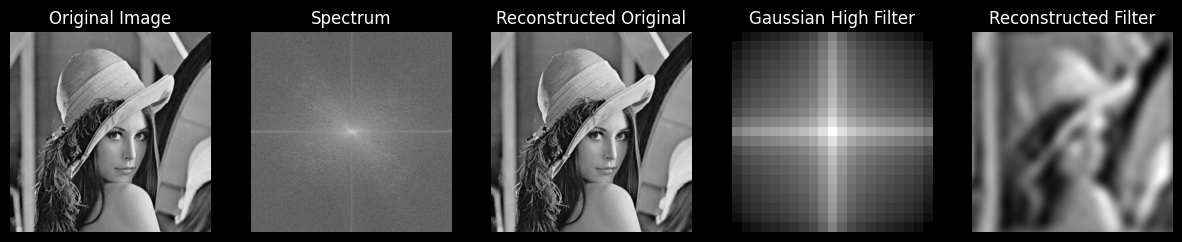

In [362]:
plt.figure(figsize=(15,15))

plt.subplot(1,5,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title('Spectrum')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(image_back,cmap='gray')
plt.title('Reconstructed Original')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(mag_spec,cmap='gray')
plt.title('Gaussian High Filter')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(image_back_filter,cmap='gray')
plt.title('Reconstructed Filter')
plt.axis('off')


plt.show()
